In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('../dados/Ano-2017.csv', delimiter=';', decimal=',')

/home/gileno/workspace/cursos/curso-ensinar/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(dados)

272999

In [4]:
dados.head()

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,4,2017,0,NaN,NaN,1377952,5828.0,0,3074,6266962
1,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,10,2017,0,NaN,NaN,1430312,5993.0,0,3074,6408821
2,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306682
3,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306518
4,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306675


In [6]:
dados['txtDescricao'].value_counts()

Emissão Bilhete Aéreo                                        79684
COMBUSTÍVEIS E LUBRIFICANTES.                                59827
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    24399
SERVIÇOS POSTAIS                                             22879
TELEFONIA                                                    20024
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    19518
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                   17751
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         10533
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        5780
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 5300
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                 2200
PASSAGENS AÉREAS                                              1945
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                   1237
ASSINATURA DE PUBLICAÇÕES                                      857
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.      

In [7]:
dados['vlrLiquido'].iloc[0]

296.0

In [8]:
dados['vlrLiquido'].sum()

178183152.62

In [9]:
dados['vlrLiquido'].describe()

count    272999.000000
mean        652.687932
std        1945.041693
min       -3962.780000
25%          50.000000
50%         160.820000
75%         567.390000
max       79900.000000
Name: vlrLiquido, dtype: float64

In [11]:
dados.groupby('txtDescricao')['vlrLiquido'].sum().reset_index().sort_values('vlrLiquido', ascending=False)

,txtDescricao,vlrLiquido
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,4.452070e+07
4,Emissão Bilhete Aéreo,3.955923e+07
9,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,2.291805e+07
10,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1.954203e+07
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",1.610485e+07
1,COMBUSTÍVEIS E LUBRIFICANTES.,1.556620e+07
17,TELEFONIA,6.961382e+06
16,SERVIÇOS POSTAIS,2.834888e+06
7,LOCAÇÃO OU FRETAMENTO DE AERONAVES,2.374568e+06
12,PASSAGENS AÉREAS,2.123669e+06


In [12]:
dados.groupby('txNomeParlamentar')['vlrLiquido'].sum().reset_index().sort_values('vlrLiquido', ascending=False)

,txNomeParlamentar,vlrLiquido
13,ALAN RICK,483417.65
469,ROCHA,473775.28
296,LEO DE BRITO,467585.63
452,REMÍDIO MONAI,466414.13
491,RÔMULO GOUVEIA,465811.41
...,...,...
381,MOEMA GRAMACHO,-711.69
225,INDIO DA COSTA,-904.55
180,FERNANDO JORDÃO,-1412.69
319,LUIZ CARLOS BUSATO,-1494.69


In [13]:
import requests

In [14]:
resposta = requests.get("https://dadosabertos.camara.leg.br/api/v2/deputados")

In [15]:
resposta.text

'{"dados":[{"id":204554,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204554","nome":"ABÍLIO SANTANA","siglaPartido":"PL","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/37906","siglaUf":"BA","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204554.jpg","email":"dep.abiliosantana@camara.leg.br"},{"id":204521,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204521","nome":"ABOU ANNI","siglaPartido":"PSL","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36837","siglaUf":"SP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204521.jpg","email":"dep.abouanni@camara.leg.br"},{"id":204379,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204379","nome":"ACÁCIO FAVACHO","siglaPartido":"PROS","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36763","siglaUf":"AP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204379.jpg

In [16]:
deputados = resposta.json()

In [17]:
type(deputados)

dict

In [18]:
deputado_id = deputados['dados'][0]['id']

In [19]:
deputado_id

204554

In [20]:
url_despesas = f"https://dadosabertos.camara.leg.br/api/v2/deputados/{deputado_id}/despesas"

In [21]:
url_despesas

'https://dadosabertos.camara.leg.br/api/v2/deputados/204554/despesas'

In [22]:
resposta = requests.get(url_despesas)
despesas = resposta.json()

In [23]:
despesas

{'dados': [{'ano': 2019,
   'mes': 8,
   'tipoDespesa': 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
   'codDocumento': 6915356,
   'tipoDocumento': 'Nota Fiscal',
   'codTipoDocumento': 0,
   'dataDocumento': '2019-08-12',
   'numDocumento': '386469334',
   'valorDocumento': 138.61,
   'urlDocumento': 'https://www.camara.leg.br/cota-parlamentar/documentos/publ/3282/2019/6915356.pdf',
   'nomeFornecedor': 'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA',
   'cnpjCpfFornecedor': '15139629000194',
   'valorLiquido': 131.9,
   'valorGlosa': 6.71,
   'numRessarcimento': '',
   'codLote': 1632429,
   'parcela': 0},
  {'ano': 2019,
   'mes': 9,
   'tipoDespesa': 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
   'codDocumento': 6924576,
   'tipoDocumento': 'Recibos/Outros',
   'codTipoDocumento': 1,
   'dataDocumento': '2019-09-23',
   'numDocumento': 'S/N',
   'valorDocumento': 1500.0,
   'urlDocumento': 'https://www.camara.leg.br/cota-parlamentar/documentos/publ/

In [25]:
dados.head()

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,4,2017,0,NaN,NaN,1377952,5828.0,0,3074,6266962
1,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,10,2017,0,NaN,NaN,1430312,5993.0,0,3074,6408821
2,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306682
3,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306518
4,ABEL MESQUITA JR.,178957.0,1.0,2015,RR,DEM,55.0,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,5,2017,0,NaN,NaN,1393809,5869.0,0,3074,6306675


In [26]:
dados.groupby(['numMes', 'txtDescricao'])['vlrLiquido'].sum()

numMes  txtDescricao                                            
1       ASSINATURA DE PUBLICAÇÕES                                     14648.41
        COMBUSTÍVEIS E LUBRIFICANTES.                               1256569.36
        CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.               1339526.83
        DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                        3119603.30
        Emissão Bilhete Aéreo                                       2548729.27
                                                                       ...    
11      PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                    1409.89
        SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.       2330.12
        SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                      5456.70
        SERVIÇOS POSTAIS                                             100620.73
        TELEFONIA                                                       877.10
Name: vlrLiquido, Length: 195, dtype: float64

In [27]:
dados_agrupados = dados.groupby(['numMes', 'txtDescricao'])['vlrLiquido'].sum()

In [29]:
dados_agrupados[5]['ASSINATURA DE PUBLICAÇÕES']

50708.08000000001

In [30]:
dados_agrupados[1]

txtDescricao
ASSINATURA DE PUBLICAÇÕES                                      14648.41
COMBUSTÍVEIS E LUBRIFICANTES.                                1256569.36
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                1339526.83
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         3119603.30
Emissão Bilhete Aéreo                                        2548729.27
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                     52944.94
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.         92907.82
LOCAÇÃO OU FRETAMENTO DE AERONAVES                            284860.00
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                           12000.00
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                2137435.92
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    1900718.17
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR              13327.50
PASSAGENS AÉREAS                                              134933.44
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS        

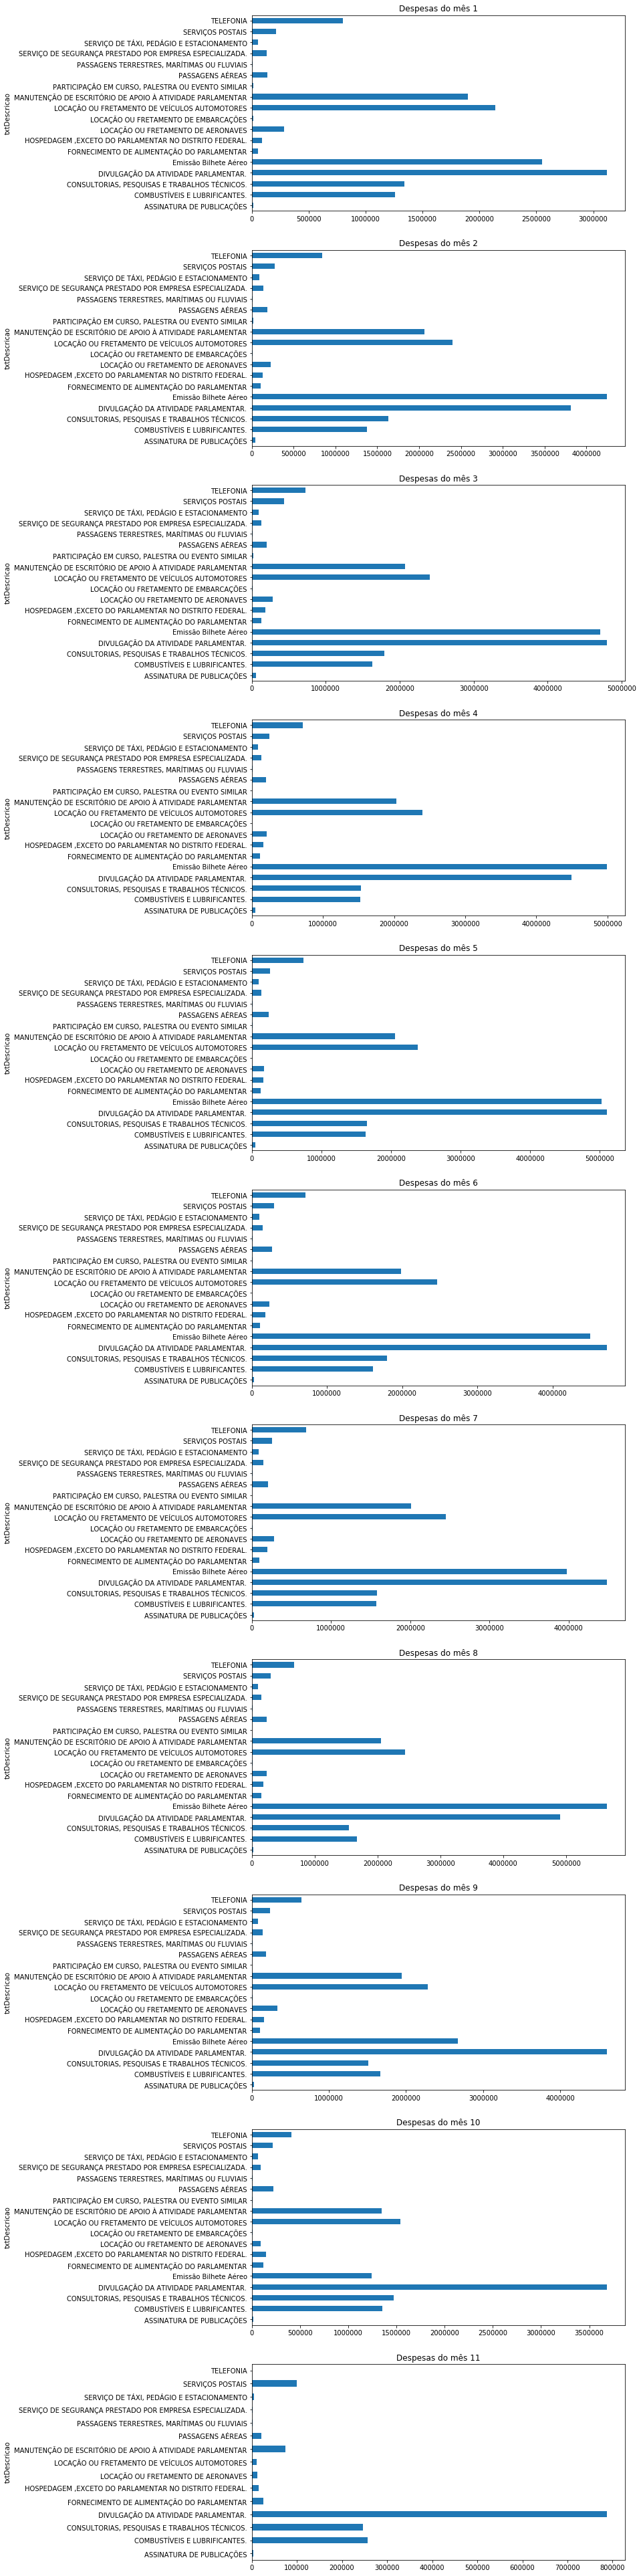

In [34]:
import matplotlib.pyplot as plt
dados_agrupados = dados.groupby(['numMes', 'txtDescricao'])['vlrLiquido'].sum()
figura, eixos = plt.subplots(nrows=11, ncols=1)
for i in range(11):
    mes = i + 1
    dados_agrupados[mes].plot.barh(
        ax=eixos[i], figsize=(10, 70), title='Despesas do mês %s' % mes
    )

In [33]:
figura.savefig('despesas.png')